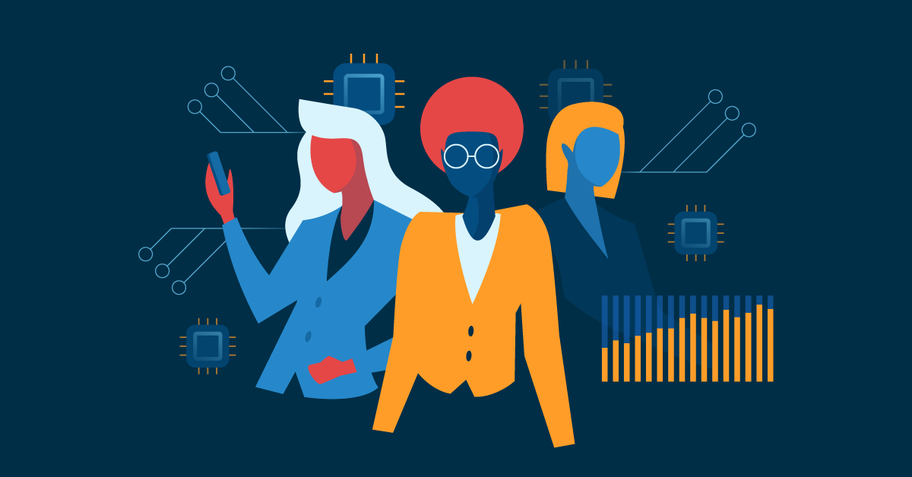
 # Woman in data science, Deeper dive into Kaggle Survey Data for year 2021
 ### How are the Ladies doing in data science field?
I this brief exploratory Analysis, I wanted to illustrate the difference between the amount of men and women on the Kaggle platform. This survey can be a small sample to gain some new insights on how and where the Data Science enthusiasts do their data analysis. I will also use some figures to explain how the ladies are doing in the data world.

In [ ]:
#importing the libraries needed for the project:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#setting dark grid for the charts:
sns.set_theme(style="darkgrid" )

 I used the "2021 Kaggle Machine Learning and Data Science Survey" as my data source. This industry-wide survey presents a truly comprehensive view of the state of data science and machine learning.This set has 365 columns. I am going to need only the first Six Columns for this project. So I made my Data frame with the code below. Dataset doesn't seem to have null values. this Data is categorical and I will go over different Categories to answer some questios.


In [ ]:
#uploading the Dataset, it has many colums so we need to set low_memory to false
df0 = pd.read_csv('../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv', low_memory=False)
#chosing the columns I need:
df=df0.loc[:,['Q1','Q2','Q3','Q4','Q5','Q6']]
#deleting the questios row:
df.drop(axis=0, index=0, inplace=True)
#setting the column names:
df.columns = ['age', 'gender', 'country', 'education','title', 'experience']
df.describe() #for a quick check of the data:

## Underrepresented?
Women are not represented enough in the data science world. Using a simple description for the dataset shows that men are the top gender in Kaggle platform. Which is the first sign of the unflattering news coming ahead. 

In [ ]:
df.groupby('gender').size() #to find the count for each gender

20598 Men responded to the Survey whereas 4890 Women. Now we start seeing the huge gap. Let's make a quick chart to visually get hit by the bitter truth: 

In [ ]:
#make a catplot:
sns.catplot(x= 'gender', kind='count', data = df, order=['Man', 'Woman','Nonbinary'],
            height=6, aspect=4/2, palette = 'rocket') #I used man,woman and nonbinary.

Wow! It doesn't look good at all! Men are almost four times more. We are truly underrepresented!
I just need to check Canada before moving forward to dive deeper into Ladies in the data science world.

In [ ]:
Canada = df[df['country'] == 'Canada'] #made a canada variable 
#bar plot for Canada
sns.catplot(x= 'gender', kind='count', data = Canada, order=['Man', 'Woman','Nonbinary'],
            height=6, aspect=4/2, palette = 'rocket')

Unfortunately Canada doesn't look  any good either.
Sometimes when data confirms your hypothesis with just a chart it is not good news. It means we  as women are underrepresented in Dataland!!!!


## Ladies On Kaggle

Let's dive deeper into the women in data science. To see who we are. To check different fields such as age, education, location and so on.
I made a woman-only dataset below:

In [ ]:
#woman only dataset:
woman = df[df['gender'] == 'Woman']
woman.head(10) #to see how the data looks 

Since we are ready Let's answer some questions!


### How old are we?
I use percentage to make a more telling graph. therefore I made a new set called w1 and Normalized it. the below shows the code and the w1 table:

In [ ]:
#Getting the age column and normlize to get the values
w1 = woman['age'].value_counts(normalize=True)
#multiply the values to 100 to get the percentage:
w1 = w1.mul(100)
#name the column
w1 = w1.rename('percent').reset_index()
w1

Turns out the majority of us are on the younger side of the age spectrum.
Now let's check the graph:

In [ ]:
sns.catplot(x='index',y='percent',kind='bar', data=w1,height=6, aspect=4/2, palette = 'rocket')#bar chart(catplot)

Greetings young butterflies!!! And respect to people on the older side! You are the most valuable!

### Where are we from? 

In [ ]:
w2 = woman['country'].value_counts(normalize=True) #to get the normalized value to calculate pecentage
w2 = w2.mul(100) #multiply to 100 to find percentage
w2 = w2.rename('percent').reset_index() #setting the column name
w2 = w2.iloc[:11] # choose top 10
w2 = w2.drop([2]) # delete the other row
#renaming the rows to shorten them:
w2['index'] = w2['index'].replace({'United States of America' : 'USA', 
                                    'United Kingdom of Great Britain and Northern Ireland' : 'UK'})
w2 #show the table

 India is the absolute front runner almost 34 percent of all the ladies are from India.
 After India, the United States stands second with around 12 percent,
 and Egypt, UK , Nigeria, China and Russia with 2 percent. Indonesia, Taiwan and Germany each with around 1 perscent or less are the next.


In [ ]:
sns.catplot(x='index',y='percent',kind='bar', data=w2, height=6, aspect=4/2, palette = 'rocket') #bar chart(catplot)

 India is the absolute front runner. Almost 34 percent of all the ladies are from India! Amazing job ladies! You are making us proud! 
 
### How much did we study?

Majority of the ladies have Master's degree and Bachelor's.  Followed by Doctoral degree.  

In [ ]:
w3 = woman['education'].value_counts(normalize=True)#normalize to get the value
w3 = w3.mul(100) #multiply by 100 to get the percentage
w3 = w3.rename('percent').reset_index() #rename column name
#shorten the row names
w3['index'] = w3['index'].replace({ 'Some college/university study without earning a bachelor’s degree': 'No degree', 
                                    'No formal education past high school' : 'High School'}) 
w3 = w3.drop([4]) # delete the no anwer 
w3

Now check out the chart to see the differences better:

In [ ]:
sns.catplot(x='index',y='percent',kind='bar', data=w3, height=6, aspect=4/2, palette = 'rocket') #bar chart(catplot)

### What do we do? 
Students have a big share. Data scientist and analyst. And the number 4 is not employed women. It is really amazing that ladies with different backgrounds find Data Science interesting.



In [ ]:
w4 = woman['title'].value_counts(normalize=True)  #to get the normalized value to calculate pecentage
w4 = w4.mul(100)    #multiply by 100 to find percentage
w4 = w4.rename('percent').reset_index() #rename column name
#shorten the row names
w4['index'] = w4['index'].replace({ 'Currently not employed': 'Not employed', 'Machine Learning Engineer': 'ML Engineer',
                                 'Software Engineer': 'Software Eng' })
w4 = w4.iloc[:10] #get the top 10
w4 = w4.drop([4]) # delete th Other row
w4

In [ ]:
sns.catplot(x='index',y='percent',kind='bar', data=w4, height=6, aspect=4/2, palette = 'rocket')  #bar chart(catplot)

### Coding Experience

1 to 3 years of experience is at the top with 32 percent. And surprisingly come new coders with less than a year of experience. It shows more people are getting interested in the field.

In [ ]:
w5 = woman['experience'].value_counts(normalize=True)  #to get the normalized value to calculate pecentage
w5 = w5.mul(100)   #multiply by 100 to find percentage
w5 = w5.rename('percent').reset_index() #rename column name
w5

In [ ]:
sns.catplot(x='index',y='percent',kind='bar', data=w5, height=6, aspect=4/2, palette = 'rocket') #bar chart(catplot)

This was just a quick and simple look into the world of women in data science. So many more should be done and hopefully so many more ladies will look into data science more positively.